In [49]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# read the listing dataset and show first few rows
listings = pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [34]:
# read the calendar dataset and show first few rows
calendar = pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [35]:
# transform 'available' into t =1 and f=0
calendar['available'] = calendar['available'].map(lambda available: 1 if available == 't' else 0)

In [36]:
ocp = calendar[['listing_id', 'available']].groupby('listing_id').mean()
ocp['occupancy'] = 1 - ocp['available']
ocp.drop(['available'], axis = 1, inplace=True)
ocp['id'] = ocp.index

In [37]:
ocp.head()

,occupancy,id
listing_id,,
3335,0.153425,3335
4291,0.000000,4291
5682,0.153425,5682
6606,0.000000,6606
7369,0.854795,7369


In [38]:
ocp.describe()

,occupancy,id
count,3818.000000,3.818000e+03
mean,0.329390,5.550111e+06
std,0.347322,2.962660e+06
min,0.000000,3.335000e+03
25%,0.013699,3.258256e+06
50%,0.156164,6.118244e+06
75%,0.660274,8.035127e+06
max,1.000000,1.034016e+07


Let's define the Airbnb rooms whose occupancy rates are greater than or equal to 70% are popular.

In [39]:
threshold = 0.70

In [40]:
# join tables
data = pd.merge(ocp, listings, how='inner', left_on='id', right_on='id')

In [41]:
data.head()

,occupancy,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0.153425,3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,4,NaN
1,0.000000,4291,https://www.airbnb.com/rooms/4291,20160104002432,2016-01-04,Sunrise in Seattle Master Suite,NaN,"Located in Seattle, this is a spacious, clean...","Located in Seattle, this is a spacious, clean...",none,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,5,1.14
2,0.153425,5682,https://www.airbnb.com/rooms/5682,20160104002432,2016-01-04,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,...,10.0,f,NaN,WASHINGTON,t,strict,f,t,1,4.21
3,0.000000,6606,https://www.airbnb.com/rooms/6606,20160104002432,2016-01-04,"Fab, private seattle urban cottage!",NaN,"Soo centrally located, this is a little house ...","Soo centrally located, this is a little house ...",none,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.66
4,0.854795,7369,https://www.airbnb.com/rooms/7369,20160104002432,2016-01-04,launchingpad/landingpad,contemporary condo on the western edge of pike...,spacious condo with all the amenities,contemporary condo on the western edge of pike...,none,...,9.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.50


array([1], dtype=int64)

In [42]:
def featurePlot(feature):
    """
    draw a plot to compare feature of popular and unpopular homes
    """
    
    plt.figure(figsize=(8,6))
        
    # if not float, draw bar plot
    if data[feature].dtype != np.float:
        # build a tempary DataFrame for using seaborn easily
        # includes 3 columns: occupancy, popularity and index
        count_popular = data[data['occupancy'] >= threshold][feature].value_counts()
        count_unpopular = data[data['occupancy'] < threshold][feature].value_counts()
        freq_popular = pd.DataFrame(count_popular / sum(count_popular))
        freq_popular['popularity'] = 'Popular'
        freq_popular['index'] = freq_popular.index
        freq_unpopular = pd.DataFrame(count_unpopular / sum(count_unpopular))
        freq_unpopular['popularity'] = 'Unpopular'
        freq_unpopular['index'] = freq_unpopular.index
        
        plot_data = pd.concat([freq_popular, freq_unpopular], ignore_index=True)
        sns.barplot(x='index', y=feature, hue='popularity', data=plot_data, palette='GnBu')
        plt.xticks(rotation='vertical')
        plt.legend(loc=1)
    
    # if float, draw kde line
    else:
        sns.kdeplot(data[feature][data['occupancy'] >= threshold], color='m')
        sns.kdeplot(data[feature][data['occupancy'] < threshold], color='c')
        plt.legend(['Popular', 'Unpopular'], loc=1)
    
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    plt.show()

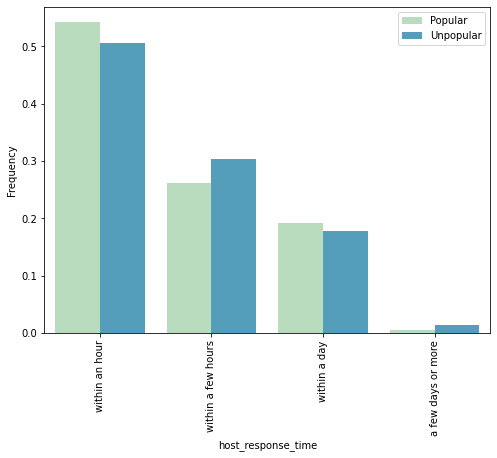

In [43]:
# host response time
featurePlot('host_response_time')

The more sooner the host responds, more the chances to rent.

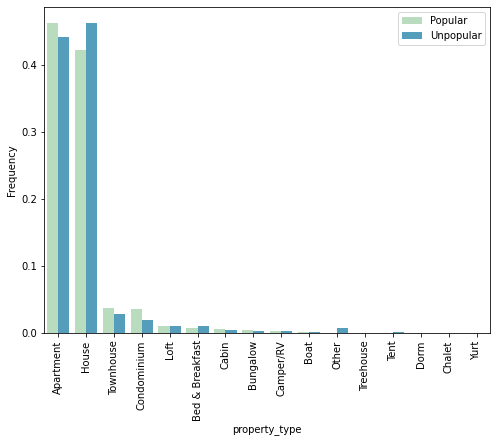

In [44]:
# property type
featurePlot('property_type')

Houses are more unpopular than apartments

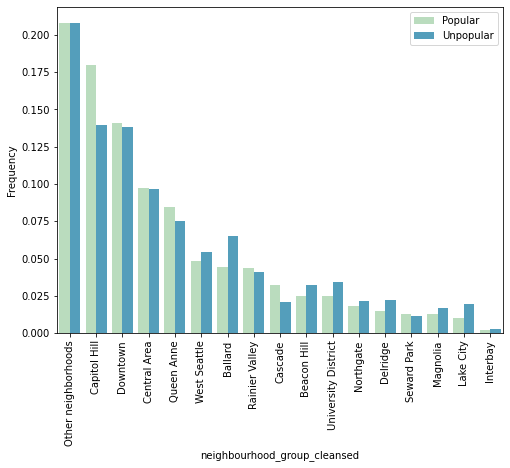

In [46]:
# neighbourhood
featurePlot('neighbourhood_group_cleansed')

Capital Hill is very popular.

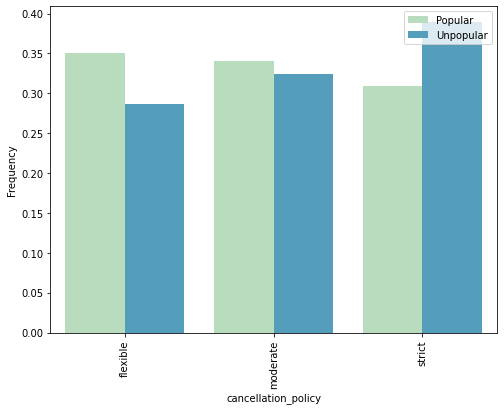

In [47]:

# cancellation policy
featurePlot('cancellation_policy')

Listings with more flexible cancellation policy are more popular